#PRVI CAS

Prvo nesto kratko o MonteKarlo metodi. 
Ideja je da se generisu neki slucajni brojevi, na odredjeni nacin ispitaju neophodni uslovi (tj fakticki gledamo koliko cesto se nesto "realizovalo") i vratimo taj broj. 

Ta metoda specijalno dobro prolazi u slucaju integracije i pogodna je ako imamo neke nezgodne podintegralne funkcije, koje je tesko ili nemoguce izraziti u elementarnim funkcijama. U slucaju da se integracija ne vrsi na skupu [0,1] vec na nekom drugom, 
moramo da pazimo kako biramo granice za generisanje pseudoslucajnih brojeva. Promenljiva "x" se svakako krece po granicama integracije, dok "y" od "min f(x)" do "max f(x)" po skupu svih mogucih vrednosti za "x". 
Zato je neophodan uslov da podintegralna funkcija f(x) bude ogranicena na datom skupu.

Pokazacemo na primeru nekih prostih funkcija.

Zelimo da odredimo povrsinu ispod neke odredjene funkcije na intervalu [0, 1] 
pomocu Monte Karlo metode.

In [20]:
import numpy as np

def Montekarlo(N,s): # s - stepen funkcije, pozitivan broj
    brojac=[]
    for i in range(N):
        x=random.rand()
        y=random.rand()
        if y<x**s:
            brojac.append(1)
        else: brojac.append(0)
    return(sum(brojac)/N)

Montekarlo(10000, 5)

0.1723

Druga verzija iste funkcije:

In [ ]:
def Montekarlo2(n,s):
  x=runif(n, 0, 1)
  y=runif(n, 0, 1)
  z=ifelse(y<x^s, 1, 0)
  return(mean(z))
}
Montekarlo2(n*10, s)

http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

[[ 41.31826206]]
[-73.35646552]


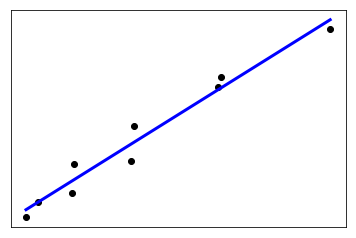

In [49]:
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

x=np.array([8.3, 9.3, 12.1, 12.3, 17.0, 17.3, 24.3, 24.5, 33.6])
x=x.reshape(-1, 1)
y=np.array([227, 312, 362, 521, 539, 728, 945, 1000, 1263])
y=y.reshape(-1, 1)

# Oceniti koeficijente modela y=a*x+b, gde su x, y - vektori, dok a i b - neki brojevi. 
regr = linear_model.LinearRegression() #objekat linearne regresije
fitted=regr.fit(x, y) # x mora biti kolona ovde, a inače je matrica 
coeff=regr.coef_ # ne vraća beta_0
intercept=regr.intercept_
print(coeff) # 41.31826206
print(intercept) # -73.35646552
plt.scatter(x, y,  color='black') # ovo i ovo ispod su trebali da budu na test skupu...
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

Drugi primer:

In [37]:
x=np.array([4,9, 10, 14, 4, 7, 12, 22, 1, 3, 8, 11, 5, 6, 10, 11, 16, 13, 13, 10])
y=np.array([390, 580, 650, 730, 410, 530, 600, 790, 350, 400, 590, 640,450, 520, 690, 690, 770,700, 730, 640])
#lin reg
regr = linear_model.LinearRegression() #objekat linearne regresije
fitted=regr.fit(x.reshape(-1, 1), y.reshape(-1, 1)) # x mora biti kolona ovde, a inače je matrica 
coeff=regr.coef_ # ne vraća beta_0
intercept=regr.intercept_
print(coeff) # 25.32646778
print(intercept) # 353.1648795
# ima i atribut residues_ koji vraća sumu reziduala

[[ 25.32646778]]
[ 353.1648795]


Treći primer:

In [55]:
q=np.arange(-1,1,0.05)
w=q**2+[random.normal(0, 0.05) for i in range(len(q))]
w=np.array(w)
q=q.reshape(-1, 1)
w=w.reshape(-1, 1)
# naci regresionu pravu za w u odnosu na q
regr = linear_model.LinearRegression() #objekat linearne regresije
fitted=regr.fit(q, w)
coeff=regr.coef_
print(coeff)
# daje svaki put različite koeficijente... iz R-a znamo da je model promašaj, ali kako da znamo ovde?

[[-0.02249707]]


Četvrti primer

In [56]:
import pandas
tabela=read_csv("Boston.csv")
tabela.head()
# njeće

NameError: name 'read_csv' is not defined